# Predictive Modelling with Linear Regression

### `About Dataset`
The dataset contains information on auto insurance claims across different geographical zones in Sweden. it comprises two main variables.
- X: Number of claims
- Y: Total payment for all claims in thousands of Swedish Kronor  

The data was collected and compiled by the Swedish Commitee on Analysis of Risk Premium in Motor Insurance. The exact time period represented by the data is unspecified.

***
### Content
Beyond its tabular format, this dataset offers valueable insights for insurance risk assessment and management.
### Inspiration
This dataset presents a unique opportunity for the data science community to explore various facests of auto insurance. Potential questions for the analysis includes:
- How does the number of claims correlate with the total payment?
- Can we accurately predict the total payment based on the number of claims
- Are there geographical patterns in the data that could inform insurance pricing strategies?

let us dive into the data and leverage predictive modelling techniques, specially linear regression, to uncover actionable insights.
  

In [18]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
# load Dataset

df = pd.read_csv(r"c:/users/danhaya/arewads/associate-data-scientist-in-python/data/swedish_insurance.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [20]:
# rename of columns

df.rename(columns={
    'X': 'claims',
    'Y': 'payment'
}, inplace=True)

df.head()

,claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


`Initial Data explorations`

let's visualize the dataframe to check if the data is linear.

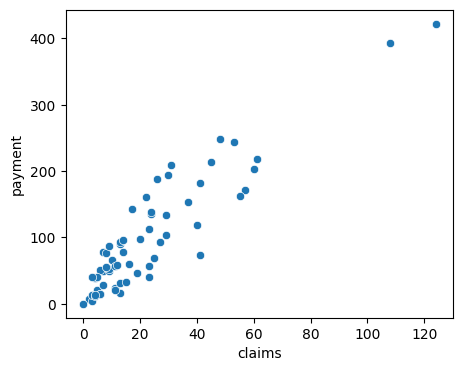

In [21]:
ax, fig = plt.subplots(figsize=(5, 4))
sns.scatterplot(
    x='claims',
    y= 'payment',
    data = df
)

plt.show()


from the graph, we can say there's a relationship between claims and payment. now let's find the strength of the relationship using correlation coefficient (**_r_**)

In [22]:
cor = df['claims'].corr(df['payment'])
print(f"The strength of the linear relationship between claims and payment is {cor:.2f}")

The strength of the linear relationship between claims and payment is 0.91


In [23]:
# let's explore the dataset

df.describe()

,claims,payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


check for missing data

In [24]:
df.isnull().sum()

claims     0
payment    0
dtype: int64

Good, the dataset has no missing values and now lets check for duplicates.

In [25]:
df.duplicated().sum()

np.int64(0)

excellent, dataset has no duplicates value as well.

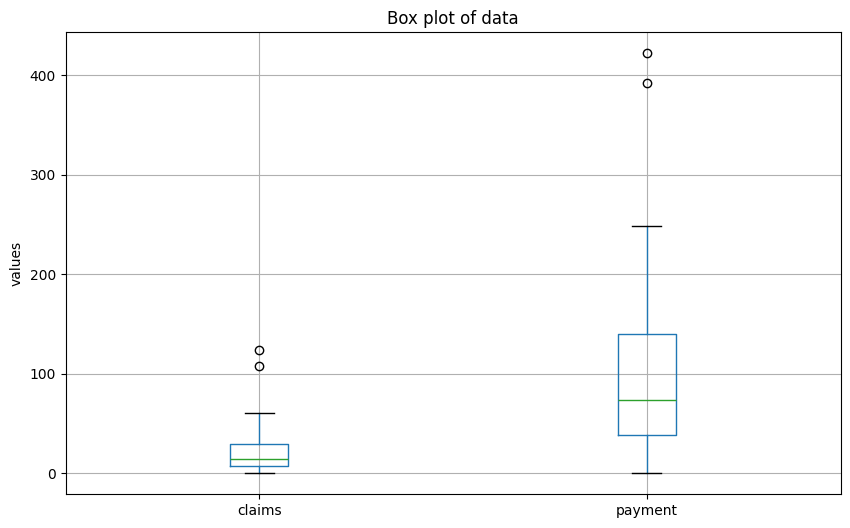

In [26]:
#check for outliers

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Box plot of data")
plt.ylabel("values")
plt.grid(True)

plt.show()

Ok, we have some outliers in the dataset. let's handle them

In [27]:
# import interquantile range from scipy.stats

from scipy.stats import iqr

In [28]:
# Handling outliers

#remove outliers from claims col

iqr_cl = iqr(df['claims'])

lower_threshold_cl = np.quantile(df['claims'], 0.25) - 1.5*iqr_cl
upper_threshold_cl = np.quantile(df['claims'], 0.75) + 1.5*iqr_cl

df_clean_cl = df[(df['claims'] >= lower_threshold_cl) & (df['claims'] <= upper_threshold_cl)]

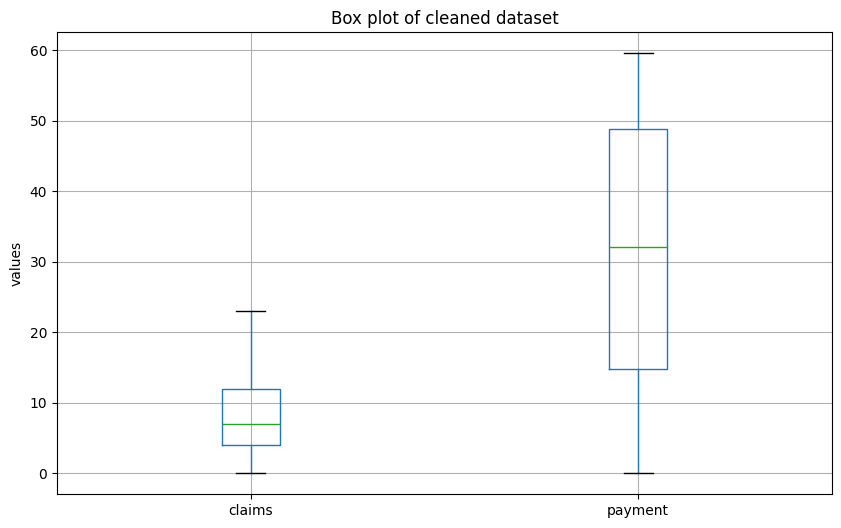

In [29]:
#remove outliers from payment col

iqr_py = iqr(df['payment'])

lower_threshold_py = np.quantile(df['payment'], 0.25) - 1.5*iqr_cl
upper_threshold_py = np.quantile(df['payment'], 0.75) + 1.5*iqr_cl

df_clean = df[(df['payment'] >= lower_threshold_cl) & (df['payment'] <= upper_threshold_cl)]

#let's visualize it

plt.figure(figsize=(10, 6))
df_clean.boxplot()
plt.title("Box plot of cleaned dataset")
plt.ylabel("values")
plt.grid(True)

plt.show()

## `Modelling`

In [33]:
# split data into X and y

X= df[['claims']]
y = df['payment']

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X)

print(f"Accuracy Score: {model.score(X_test, y_test)*100:.2f}%")

Accuracy Score: 89.51%


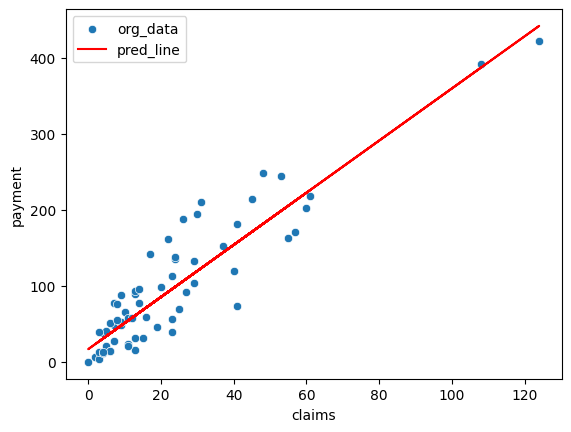

In [34]:
plt.Figure(figsize=(5,6))
sns.scatterplot(
    x='claims',
    y='payment',
    data = df
)

plt.plot(df['claims'], y_pred, color = 'red')
plt.legend(['org_data', 'pred_line'])

plt.show()

# THANK YOU